# Исследование стартапов #

- Автор: Ложникова Елена
- Дата: 11.03.2025

## Цель и задачи  

**Цель:** Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

Предстоит принять решения:
- по каким столбцам можно объединять данные из разных таблиц;
-  можно ли доверять данным о сотрудниках стартапов и их образовании;
- что значат покупки за 0 или за 1 доллар;
- какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
- как рассчитать и отобразить численные показатели и динамику.
Хорошо, если в процессе работы получится выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить данные более детально;
    - изучить взаимосвязь данных в столбце `` с другими данными.
4. Сформулировать выводы по проведённому анализу.


## Данные

Для анализа поступили данные о стартапах. Данные состоят из семи датасетов:

- `company_and_rounds.csv` - информация о компаниях и раундах финансирования
- `acquisition.csv` - информация о покупках одними компаниями других компаний
- `people.csv` - информация о сотрудниках
- `education.csv` - информация об образовании сотрудника
- `degrees.csv` - информация о типе образования сотрудника
- `fund.csv` - информация о фондах
- `investment.csv` - о раундах инвестирования

### Описание датасета `company_and_rounds`

- company ID — идентификатор компании
- name — название компании
- category code — категория области деятельности компании
- status — статус компании
- founded at — дата инвестирования
- closed at — дата закрытия компании
- domain — официальный сайт компании
- network username — ник компании в сети
- country code — код страны компании
- investment rounds — число инвестиционных раундов
- funding rounds — число раундов финансирования
- funding total — сумма финансирования
- milestones — вехи финансирования
- funding round id — идентификатор этапа финансирования
- company id — идентификатор компании
- funded at — дата финансирования
- funding round type — тип финансирования
- raised amount — сумма финансирования
- pre money valuation — предварительная денежная оценка
- participants — число участников
- is first round — является ли раунд первым
- is last round — является раунд последним

### Описание датасета `acquisition`

- id — идентификатор покупки
- acquiring_company_id — идентификатор покупающей компании
- acquired_company_id — идентификатор покупаемой компании
- term_code — варианты расчёта
- price_amount — сумма сделки
- acquired_at — дата сделки
   
### Описание датасета `people`

- id — идентификатор сотрудника
- first_name — имя сотрудника
- last_name — фамилия сотрудника
- company_id — идентификатор компании
- network_username — ник в социальных сетях

### Описание датасета `education`

- id — идентификатор записи об образовании
- person_id — идентификатор работника
- instituition — название учебного заведения
- graduated_at — дата получения образования
   
### Описание датасета `degrees`

- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

### Описание датасета `fund`

- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.

### Описание датасета `investment`

- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — индентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.

### Столбцы с похожим написанием:

- `raised amount` - сумма, привлеченная в одном конкретном раунде, `funding total` - общая сумма всех привлеченных инвестиций за всю историю компании
- `acquiring_company_id` - идентификатор компании-покупателя, `acquired_company_id` - идентификатор компании, которая была куплена.
- `founded_at` - дата основания компании, `funded_at` - дата, когда компания получила финансирование (может быть несколько в зависисмости от числа раундов финансирования).

### Связь датасетов:

- датасеты `acquisition` и `company_and_rounds`   связаны по столбцу `company_id`: `acquiring_company_id` - `company_id` -(информация о компании-покупателе) и `acquired_company_id` - `company_id` (информация о купленной компании)
- датасеты `company_and_rounds` и `fund`  связаны по столбцам `investment_rounds` - `investment_rounds` (число инвестиционных раундов) и  `milestones` - `milestones` (вехи финансирования)
- датасеты `fund` и `investment`   связаны по столбцам идентификатора фонда `id` - `fund_id`
- датасеты `education` и `people`   связаны по столбцу идентификатора сотрудника `id` - `person_id`
- датасеты `people` и `degrees`  связаны по столбцу идентификатора сотрудника `id` - `object_id`


## Структура проекта

1. Знакомство с данными: загрузка и первичная предобработка
   - 1.1. Вывод общей информации, исправление названия столбцов
   - 1.2. Смена типов и анализ пропусков
2. Предобработка данных, предварительное исследование
   - 2.1. Раунды финансирования по годам
   - 2.2. Люди и их образование
   - 2.3. Объединять или не объединять — вот в чём вопрос
   - 2.4. Проблемный датасет и причина возникновения пропусков
3. Исследовательский анализ данных.
4. Итоговые выводы.


In [1]:
!pip install phik

     |████████████████████████████████| 686 kB 1.2 MB/s eta 0:00:01


## 1. Знакомство с данными: загрузка и первичная предобработка
Начнём с загрузки библиотек и датасетов. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik_matrix для построения матрицы корреляции. Данные датасетов сохраним в переменных.

In [2]:
# Импортируем библиотеки
import pandas as pd

In [3]:
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Оформим повторяющийся путь в константу PATH и выгрузим данные в переменные 
PATH = "https://code.s3.yandex.net/datasets/"
company_df = pd.read_csv(PATH + 'company_and_rounds.csv')
acquisition_df = pd.read_csv(PATH + 'acquisition.csv')
people_df = pd.read_csv(PATH + 'people.csv')
education_df = pd.read_csv(PATH + 'education.csv')
degrees_df = pd.read_csv(PATH + 'degrees.csv')

In [6]:
# Т.к. для анализа представлены большие данные установим глобальное форматирование с разделителем групп разрядов для всех датафреймов
pd.set_option('display.float_format', '{:,.2f}'.format)

### 1.1. Вывод общей информации, исправление названия столбцов

In [7]:
# Выведем названия столбцов всех датафреймов
print(company_df.columns)
print(acquisition_df.columns)
print(people_df.columns)
print(education_df.columns)
print(degrees_df.columns)

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')
Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')
Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')
Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')
Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')


В датафрейме company_df есть два столбца `company  ID` и `company  id` с практически одинаковыми названиями и содержащими информацию об идентификаторе компании. Поверим пересечение данных в этих столбцах.

In [8]:
# Установим библиотеку matplotlib-venn
!pip install matplotlib-venn

     |████████████████████████████████| 40 kB 1.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45355 sha256=3baccf6817770e3b3cccd7ab101bc244d44087e8ae91763076fa4846b60813ff
  Stored in directory: /home/jovyan/.cache/pip/wheels/86/29/d8/0f3c5a37c967a34fb40aaabd414f92104d2ad5fb149c0114a1
Successfully built matplotlib-venn


In [9]:
from matplotlib_venn import venn2, venn3

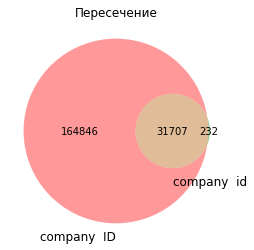

In [10]:
# Найдем уникальные значения столбцах 'company  ID' и 'company  id', удалив дубликаты и преобразовав серии в множества сравнения
first_id = set(company_df['company  ID'].dropna().unique())
second_id = set(company_df['company  id'].dropna().unique())
# Сравним множества уникальных значений с помощью диаграммы Венна
venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

plt.title("Пересечение")
plt.show() 

На диаграмме Венна видим, что в 'company  ID' 164846 уникальных данных, а в 'company  id' - 31707 и 232 значения есть в обоих столбцах, т.е данные перескаются крайне мало и в большей степени содержат уникальные значения.

In [11]:
# Для более удобного визуального различия переименуем столбец 'company  id' в'company id round'
company_df = company_df.rename(columns= {'company  id':'company  id  round'})

In [12]:
print(company_df.columns)

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id  round', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')


- Необходимо привести названия всех столбцов к единому стилю snake_case

In [13]:
# Приведем названия стобцов в датафрейме `company_df` к нижнему регистру и единому стилю snake_case
company_df.columns = [col.lower().replace('  ', '_') for col in company_df.columns]

In [14]:
# Проверим названия столбцов
company_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_round', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

In [15]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_round     52928 non-null   float64
 15  funded_at        

In [16]:
company_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id_round,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00
1,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,889.00,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3.00,0.00,0.00
2,1.00,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,"2,312.00",1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4.00,1.00,0.00
3,10.00,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.00,...,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.00,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.00,...,4.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [18]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [19]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [20]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.00,NaN
1,100,Peter,Lester,27.00,NaN
2,1000,Dr. Steven,E. Saunders,292.00,NaN
3,10000,Neil,Capel,"2,526.00",NaN
4,100000,Sue,Pilsch,NaN,NaN


In [21]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [22]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [23]:
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [24]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


**После первичного анализа данных можно сделать следующие выводы:**
- Датасет `company_and_rounds.csv` содержит 22 столбца и 217774 строки, в которых представлена основная информация о компаниях и раундах финансирования. Значения в столбцах с типом данных 'float' можно преобразовать до оптимального размера. Названия столбцов преобразованы к стилю snake_case и нижнему регистру. Столбцы с практически одинаковыми названиями `company  ID` и `company  id` проверены на пересечение данных.
- Датасет `acquisition.csv` содержит 6 столбцов и 9407 строк, в которых представлена информация о покупках одними компаниями других компаний. 
- Датасет `people.csv` содержит 5 столбцов и 226709 строк, в которых представлена информация о сотрудниках.
- Датасет `education.csv` содержит 4 столбца и 109610 строк, в которых представлена информация об образовании сотрудника. 
- Датасет `degrees.csv` содержит 4 столбца и 109610, в которых представлена информация о типе образования сотрудника. 
- В датафреймах тип данных`object` в столбцах с датой необходимо преобразовать в тип `datetime`.
- Пропуски содержатся во всех датафреймах. 
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

### 1.2. Смена типов и анализ пропусков

In [25]:
# Поменяем тип данных в столбцах с датой с типа object на datetime64[ns]
company_df['founded_at'] = company_df['founded_at'].astype('datetime64[ns]')
company_df['funded_at'] = company_df['funded_at'].astype('datetime64[ns]')
company_df['closed_at'] = company_df['closed_at'].astype('datetime64[ns]')

In [26]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [27]:
# Оптиитзируем размерность в столбцах с типом 'float'
company_df['investment_rounds'] = pd.to_numeric(company_df['investment_rounds'], downcast = 'float')
company_df['funding_rounds'] = pd.to_numeric(company_df['funding_rounds'], downcast = 'float')
company_df['funding_total'] = pd.to_numeric(company_df['funding_total'], downcast = 'float')
company_df['milestones'] = pd.to_numeric(company_df['milestones'], downcast = 'float')
company_df['funding_round_id'] = pd.to_numeric(company_df['funding_round_id'], downcast = 'float')
company_df['raised_amount'] = pd.to_numeric(company_df['raised_amount'], downcast = 'float')
company_df['pre_money_valuation'] = pd.to_numeric(company_df['pre_money_valuation'], downcast = 'float')
company_df['participants'] = pd.to_numeric(company_df['participants'], downcast = 'float')
company_df['is_first_round'] = pd.to_numeric(company_df['is_first_round'], downcast = 'float')
company_df['is_last_round'] = pd.to_numeric(company_df['is_last_round'], downcast = 'float')
company_df['investment_rounds'] = pd.to_numeric(company_df['investment_rounds'], downcast = 'float')

In [28]:
# Проверим результаты оптимизации
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float32       
 10  funding_rounds       217472 non-null  float32       
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  float32       
 13  funding_round_

In [29]:
na_company = pd.DataFrame({'Количество пропусков': company_df.isna().sum(),
                           'Доля пропусков (%)': (company_df.isna().mean() * 100).round(2)})
print(na_company)

                     Количество пропусков  Доля пропусков (%)
company_id                            302                0.14
name                                  302                0.14
category_code                       73888               33.93
status                                302                0.14
founded_at                         107818               49.51
closed_at                          214325               98.42
domain                              70615               32.43
network_username                   122240               56.13
country_code                       109167               50.13
investment_rounds                     302                0.14
funding_rounds                        302                0.14
funding_total                         302                0.14
milestones                            302                0.14
funding_round_id                   164846               75.70
company_id_round                   164846               75.70
funded_a

In [30]:
# Установим библиотеку missingno
!pip install missingno

In [31]:
import missingno as msno

<AxesSubplot:>

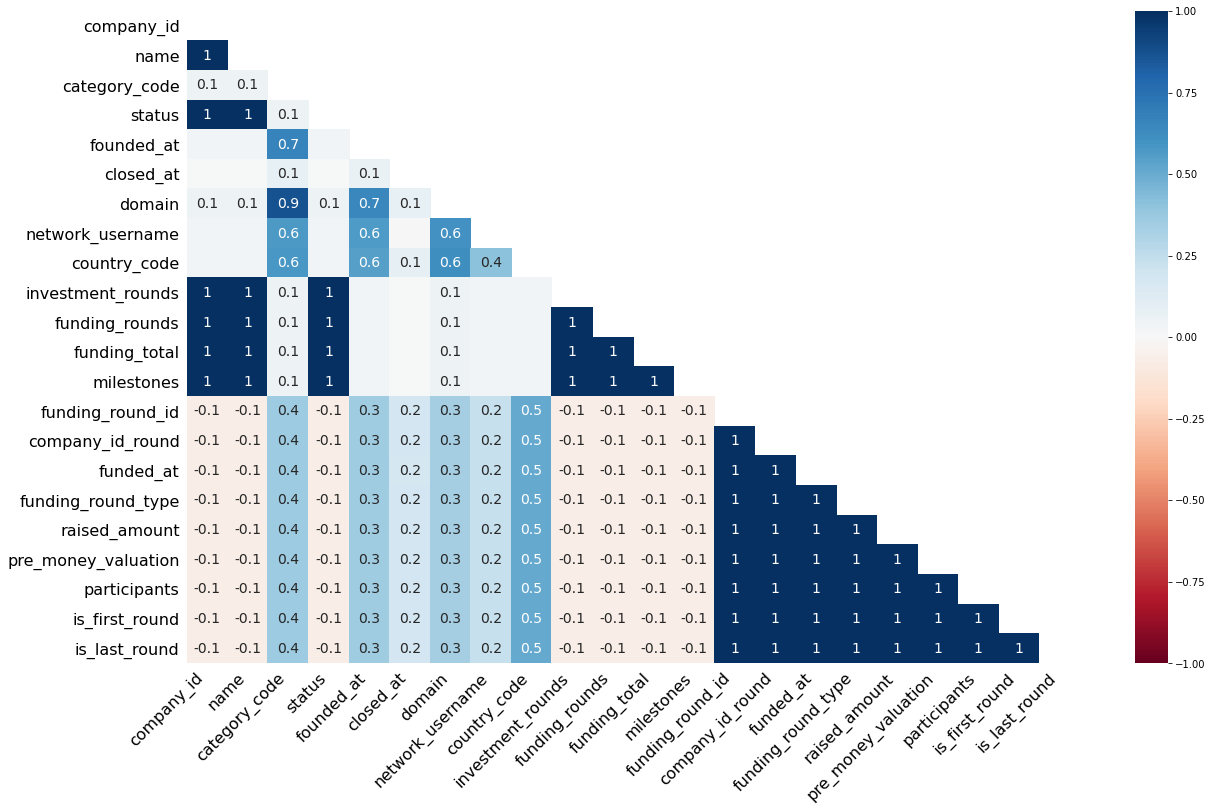

In [32]:
# Построим тепловую карту пропущенных значений в датафрейме company_df
msno.heatmap(company_df)

In [33]:
company_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_round', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

In [34]:
# Поменяем тип данных в столбце с датой с типа object на datetime64[ns]
acquisition_df['acquired_at'] = acquisition_df['acquired_at'].astype('datetime64[ns]')

In [35]:
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [36]:
na_acquisition = pd.DataFrame({'Количество пропусков': acquisition_df.isna().sum(),
                               'Доля пропусков (%)': (acquisition_df.isna().mean() * 100).round(2)})
print(na_acquisition)

                      Количество пропусков  Доля пропусков (%)
id                                       0                0.00
acquiring_company_id                     0                0.00
acquired_company_id                      0                0.00
term_code                             7576               80.54
price_amount                             0                0.00
acquired_at                             29                0.31


In [37]:
na_people= pd.DataFrame({'Количество пропусков': people_df.isna().sum(),
                         'Доля пропусков (%)': (people_df.isna().mean() * 100).round(3)})
print(na_people)

                  Количество пропусков  Доля пропусков (%)
id                                   0                0.00
first_name                           5                0.00
last_name                            1                0.00
company_id                      192094               84.73
network_username                187842               82.86


In [38]:
# Поменяем тип данных в столбце с датой с типа object на datetime64[ns]
education_df['graduated_at'] = education_df['graduated_at'].astype('datetime64[ns]')

In [39]:
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [40]:
na_education = pd.DataFrame({'Количество пропусков': education_df.isna().sum(),
                             'Доля пропусков (%)': (education_df.isna().mean() * 100).round(2)})
print(na_education)

              Количество пропусков  Доля пропусков (%)
id                               0                0.00
person_id                        0                0.00
instituition                    55                0.05
graduated_at                 51556               47.04


In [41]:
na_degrees = pd.DataFrame({'Количество пропусков': degrees_df.isna().sum(),
                           'Доля пропусков (%)': (degrees_df.isna().mean() * 100).round(2)})
print(na_degrees)

             Количество пропусков  Доля пропусков (%)
id                              0                0.00
object_id                       0                0.00
degree_type                 11218               10.23
subject                     28312               25.83


**После анализа пропусков можно сделать следующие выводы:**

- В датафрейме `company_df` есть пропуски во всех столбцах. В столбцах `company_id`, `name`, `status`, `investment_rounds`, `funding_rounds`, `funding_total`, `milestones` количество пропусков ничтожно мало 0.1%. Столбцы `category_code`, `domain`, `network_usernam`, `country_code` имеют умеренное количество пропусков (от 30% до 60%), пропуски в этих столбцах могут быть связаны с отсутствием информации. Столбцы с большим количеством пропусков (более 75%): `closed_at`, `funding_round_id`, `company_id_round`, `funded_at`, `funding_round_type`, `raised_amount`, `pre_money_valuation`, `participants`, `is_first_round`, `is_last_round`. Пропуски в этих столбцах могут быть связаны с тем, что данные не применимы для всех записей (например, не все компании закрылись, не все раунды финансирования имеют информацию о сумме привлечённых инвестиций).
Для того, чтобы избежать искажения результатов анализа, оставим все пропуски без изменения.

- В датафрейме `acquisition_df` есть пропуски в двух столбцах: `acquired_at` с информацией о дате сделки (0.3%), `term_code` с вариантами расчёта (80,5%). Очень значительное количество пропусков в столбце `term_code` могло возникнуть, если эта информация была необязательна для заполнения или не доступна, а также вследствии ошибок при сборе и загрузке информации. Оставим пропуски без изменений.

- В датафрейме `people_df` выявлены пропуски в четырех столбцах: `first_name` (0.004%), `last_name` (0.002%), `company_id` (84.7%) и `network_username` (82.9%). Пропуски в этих столбцах могут быть связаны с тем, что данные не применимы для всех записей или не были собраны. Оставим пропуски без изменений.

- В датафрейме `education_df` выявлены пропуски в двух столбцах: `instituition` (0.05%), `graduated_at` (47%). Пропуски в столбце `graduated_at` с датой окончания образования могут быть связаны с тем, что сотрудник ещё не закончил учебное заведение, а также с тем, что данные могли быть не указаны или не собраны, или в следствии ошибок при загрузке. Оставим пропуски без изменений.

- В датафрейме `degrees_df` выявлены пропуски в двух столбцах: `degree_type` (10.2%), `subject` (25.8%). Информация о типе образования и специальности может быть необязательной для заполнения или не была указана или не была загружена вследствии ошибки. Оставим пропуски без изменений.

**В результате предобработки данных были выполнены следующие действия:**

- В столбцах с типом данных `float64` выполнена оптимизация до оптимальной размерности;
- В столбцах с информацией о датах тип данных `object` оптимизирован в тип данных `datetime`;
- Изучены пропуски в данных. Во всех датафреймах выявлены пропуски от незначительно малых до очень больших. Большинство пропусков может быть связано с необязательностью заполнением этих данных или если они не были указаны/собраны, а также с ошибками при загрузке.

## 2. Предобработка данных, предварительное исследование

### 2.1. Раунды финансирования по годам

Составьте сводную таблицу по годам, в которой на основании столбца raised_amount для каждого года указан:
- типичный размер средств, выделяемый в рамках одного раунда;
- общее количество раундов финансирования за этот год.
- 
Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:
- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [42]:
# Выделим год из даты и создадим новый столбец `year`
company_df['year'] = company_df['funded_at'].dt.year.astype('Int64') 

In [43]:
company_df['year']

0         2005
1         2007
2         2008
3         <NA>
4         <NA>
          ... 
217769    2011
217770    2011
217771    2012
217772    2013
217773    2013
Name: year, Length: 217774, dtype: Int64

In [44]:
company_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_round', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round', 'year'],
      dtype='object')

In [45]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float32       
 10  funding_rounds       217472 non-null  float32       
 11  funding_total        217472 non-null  float32       
 12  milestones           217472 non-null  float32       
 13  funding_round_

In [46]:
# Построим сводную таблицу количества раундов финансирования и средняя сумма привлеченных инвестиций по годам
pivot_round = company_df.pivot_table(index = 'year',
                                     values = ['raised_amount', 'funding_round_type'],
                                     aggfunc = {'raised_amount': 'median', 'funding_round_type' :'count'})
filtered_pivot = pivot_round[pivot_round['funding_round_type'] > 50]
print(f"\nКоличество раундов финансирования и средняя сумма привлеченных инвестиций по годам':")
display(filtered_pivot)


Количество раундов финансирования и средняя сумма привлеченных инвестиций по годам':


,funding_round_type,raised_amount
year,,
1999,76,"2,000,000.00"
2000,125,"4,200,000.00"
2001,96,"3,000,000.00"
2002,116,"4,200,000.00"
2003,159,"3,000,000.00"
2004,291,"5,000,000.00"
2005,1633,"5,500,000.00"
2006,2436,"5,000,000.00"
2007,3279,"3,973,320.00"


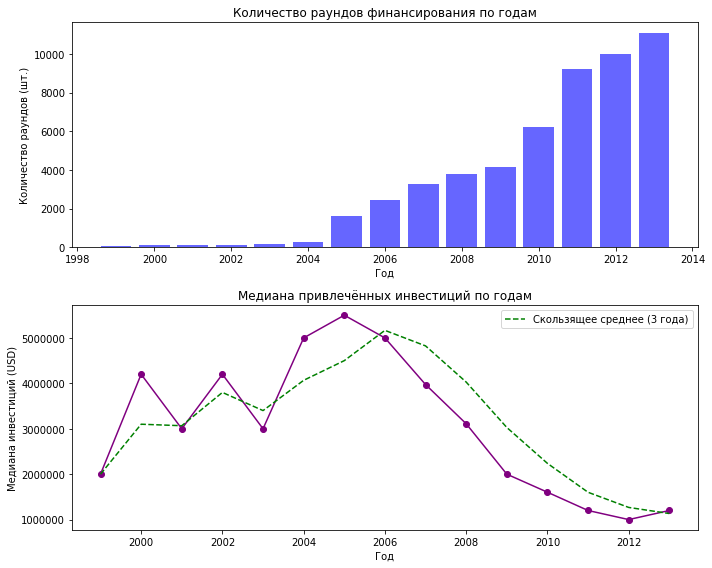

In [47]:
# Построим 2 графика 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

years = filtered_pivot.index
raised_amount = filtered_pivot['raised_amount']
funding_rounds = filtered_pivot['funding_round_type']

# График 1: Столбчатая диаграмма количества раундов по годам
ax1.bar(years, funding_rounds, color='blue', alpha=0.6)
ax1.set_title('Количество раундов финансирования по годам')
ax1.set_xlabel('Год')
ax1.set_ylabel('Количество раундов (шт.)')

# График 2: Линейный график изменения медианы привлечённых инвестиций по годам
ax2.plot(years, raised_amount, color='purple', marker='o')
ax2.set_title('Медиана привлечённых инвестиций по годам')
ax2.set_xlabel('Год')
ax2.set_ylabel('Медиана инвестиций (USD)')

# Отключаем экспоненциальный формат для оси Y
ax2.ticklabel_format(axis='y', style='plain')

# Для подтверждения тенденции выведем скользящее среднее для медианы инвестиций
rolling_mean = raised_amount.rolling(window=3, min_periods=1).mean()
ax2.plot(years, rolling_mean, color='green', linestyle='--', label='Скользящее среднее (3 года)')

ax2.legend()
plt.tight_layout()
plt.show()

- Максимальный размер собранных средств в рамках одного раунда наблюдается в 2005 году (5,500,000.00), минимальный - в 2012 году (1,000,000.00).
- В 2013 году наблюдается продолжающаяся тенденция на увеличение количества раундов и после продолжительного падения с 2006 по 2012, в 2013 году наблюдается рост выделяемых в рамках каждого раунда средств.
- Стало очень много мелких стартапов, которые активно финансируется, поэтому с одной стороны происходит рост раундов, и рост суммарных инвестиций, а с другой стороны снижение суммы инвестиций раунда raised_amount. 

### 2.2. Люди и их образование

Зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний?
- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты people.csv и education.csv, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу degrees.csv.

In [48]:
# Соединим датасеты people_df и education_df
education_people_df = people_df.merge(education_df, left_on = 'id', right_on = 'person_id', how = 'left', suffixes=('_people', '_education'))
education_people_df

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.00,NaN,"2,415.00",10.00,Harvard University,NaT
1,100,Peter,Lester,27.00,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.00,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,"2,526.00",NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,"188,200.00",network,"25,958.00","174,088.00",Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,"143,419.00",itechsocialnet,"18,871.00","118,386.00",ESCS,2004-01-01
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


In [49]:
employees_company = education_people_df[education_people_df['company_id'] == 1]
employees_company

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
4393,104800,Alex,Weinstein,1.00,alexweinstein,NaN,NaN,NaN,NaT
191139,3,Kevin,Flaherty,1.00,NaN,706.00,3.00,Washington University in St Louis,NaT
191140,3,Kevin,Flaherty,1.00,NaN,707.00,3.00,Indiana University,NaT


In [50]:
# Проверим дубликаты в id сотрудников
duplicate_counts = education_people_df.duplicated(subset=['id_people', 'person_id']).value_counts()

print("Количество дубликатов:")
print(duplicate_counts)

Количество дубликатов:
False    226708
True      40986
dtype: int64


В id сотрудников найдено 40986 дубликатов. Удалим дубликаты, чтобы избежать искажение результатов анализа.

In [51]:
# Удаляем дубликаты, сохраняя строки с информацией об образовании
# Сортируем df так, чтобы записи с информацией об образовании были в начале
df_sorted = education_people_df.sort_values(by=['id_education', 'instituition', 'graduated_at'], na_position='last')

# Удаляем дубликаты
df_unique = df_sorted.drop_duplicates(subset=['id_people'], keep='first')

# Выводим уникальный df
df_unique

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
226901,6117,Maurice,Rompre,"2,430.00",NaN,1.00,"6,117.00",NaN,NaT
227111,6136,John,Green,"2,454.00",NaN,2.00,"6,136.00","Washington University, St. Louis",1990-01-01
225686,6005,Sridhar,Gundaiah,"2,360.00",NaN,4.00,"6,005.00",University of Greenwich,2006-01-01
223790,5832,David,Peters,"2,033.00",NaN,5.00,"5,832.00",Rice University,NaT
1578,1017,John,Furrier,300.00,furrier,6.00,"1,017.00",Northeastern University,1988-01-01
...,...,...,...,...,...,...,...,...,...
267684,99996,Rick,Tamberrino,NaN,tamberrino,NaN,NaN,NaN,NaT
267688,99998,Adam,Neumann,NaN,NaN,NaN,NaN,NaN,NaT
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT


In [52]:
employees_company_1 = df_unique[df_unique['company_id'] == 1]
employees_company_1

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
191139,3,Kevin,Flaherty,1.00,NaN,706.00,3.00,Washington University in St Louis,NaT
4393,104800,Alex,Weinstein,1.00,alexweinstein,NaN,NaN,NaN,NaT


In [53]:
# Создадим новый столбец 'ed_bool' с булевыми значениями наличия информации об образовании в любом из столбцов 'instituition' и 'instituition'
df_unique['ed_bool'] = df_unique['instituition'].notna() | df_unique['graduated_at'].notna()

/tmp/ipykernel_48/2007441957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['ed_bool'] = df_unique['instituition'].notna() | df_unique['graduated_at'].notna()


In [54]:
df_unique['ed_bool']

226901    False
227111     True
225686     True
223790     True
1578       True
          ...  
267684    False
267688    False
267689    False
267692    False
267693    False
Name: ed_bool, Length: 226708, dtype: bool

In [55]:
df_unique.columns

Index(['id_people', 'first_name', 'last_name', 'company_id',
       'network_username', 'id_education', 'person_id', 'instituition',
       'graduated_at', 'ed_bool'],
      dtype='object')

In [56]:
df_unique

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,ed_bool
226901,6117,Maurice,Rompre,"2,430.00",NaN,1.00,"6,117.00",NaN,NaT,False
227111,6136,John,Green,"2,454.00",NaN,2.00,"6,136.00","Washington University, St. Louis",1990-01-01,True
225686,6005,Sridhar,Gundaiah,"2,360.00",NaN,4.00,"6,005.00",University of Greenwich,2006-01-01,True
223790,5832,David,Peters,"2,033.00",NaN,5.00,"5,832.00",Rice University,NaT,True
1578,1017,John,Furrier,300.00,furrier,6.00,"1,017.00",Northeastern University,1988-01-01,True
...,...,...,...,...,...,...,...,...,...,...
267684,99996,Rick,Tamberrino,NaN,tamberrino,NaN,NaN,NaN,NaT,False
267688,99998,Adam,Neumann,NaN,NaN,NaN,NaN,NaN,NaT,False
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,False
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,False


In [57]:
print(f'Распределение данных об образовании сотрудников:')
df_unique['ed_bool'].value_counts(normalize=True)

Распределение данных об образовании сотрудников:


False   0.70
True    0.30
Name: ed_bool, dtype: float64

- Какая-либо информация об образовании сотрудников отражена лишь в 30% данных. Это говорит о достаточно большой неполноте данных.

In [58]:
# Отсортируем компании по количесву сотрудников
df_unique.groupby('company_id')['id_people'].count().sort_values()

company_id
70,873.00       1
196,069.00      1
196,068.00      1
77,166.00       1
77,175.00       1
             ... 
499.00         63
231,067.00     72
1,242.00      138
29.00         150
59.00         244
Name: id_people, Length: 22921, dtype: int64

- Min количество сотрудников в компании - 1, max - 244. 

In [59]:
# Группируем по company_id и считаем количество уникальных id_people в каждой компании
employee_count_per_company = df_unique.groupby('company_id')['id_people'].count()
company_counts_by_employee = employee_count_per_company.value_counts().sort_index()

company_counts_by_employee_df = company_counts_by_employee.reset_index()
company_counts_by_employee_df.columns = ['Число сотрудников', 'Количество компаний']

print(company_counts_by_employee_df)

    Число сотрудников  Количество компаний
0                   1                18116
1                   2                 2709
2                   3                  921
3                   4                  450
4                   5                  237
5                   6                  138
6                   7                  100
7                   8                   59
8                   9                   46
9                  10                   25
10                 11                   30
11                 12                   16
12                 13                   17
13                 14                    8
14                 15                    3
15                 16                    4
16                 17                    5
17                 18                    3
18                 19                    3
19                 20                    3
20                 21                    2
21                 22                    2
22         

- Сгруппируем компании по численности сотрудников следующим образом: 1, 2, 3, 4-5, 6-10, 11-25, больше 26.

In [60]:
# Посчитаем число сотрудников в каждой компании и выделим группы компаний по количеству сотрудников
company_sizes = df_unique.groupby('company_id').agg({'id_people': 'count'}).reset_index()
bins   = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']

company_sizes['size_group'] = pd.cut(company_sizes['id_people'],  
                                     bins=bins,                   # Заданные интервалы
                                     labels=labels)               # Метки для интервалов            
company_sizes

,company_id,id_people,size_group
0,1.00,2,2
1,2.00,1,1
2,3.00,3,3
3,4.00,13,11-25
4,5.00,61,26+
...,...,...,...
22916,"285,897.00",2,2
22917,"285,953.00",1,1
22918,"285,972.00",2,2
22919,"285,996.00",1,1


In [61]:
# Объеденим полученный результат с датафреймом education_people_df
df_unique = df_unique.merge(company_sizes[['company_id', 'size_group']], on='company_id', how='left')
# Сгруппируем по категории компании и посчитаем среднюю долю сотрудников без информации об образовании
result = df_unique.groupby('size_group')['ed_bool'].apply(lambda x: (x == False).mean()).reset_index()
result = result.rename(columns={'ed_bool': 'share'})
print('Средняя доля сотрудников без информации об образовании по категорям компаний:')
print(result)

Средняя доля сотрудников без информации об образовании по категорям компаний:
  size_group  share
0          1   0.46
1          2   0.47
2          3   0.49
3        4-5   0.50
4       6-10   0.53
5      11-25   0.46
6        26+   0.27


- В категориях компаний с численностью сотрудников до 25 человек средняя доля сотрудников без информации об образовании отличается незначительно (47%-53%). Однако, в компаниях с численностью сотрудников более 25 человек средняя доля сотрудников без информации об образовании составляет - 27%, что практически вдвое меньше более мелких компаний. Поэтому можно сделать вывод, что полнота данных об образовании сотрудников зависит от размера компании. 

- Таблицу degrees.csv присоединять нецелесобразно, т.к. доля пропусков в столбцах с типом образования и специальностью содержит значительное количество пропусков - 10% и 28% соответственно. Присоединение возможно по ключу `object_id` - идентификатор сотрудника.

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец company_id подходит для объединения данных.
- Установите, подходит ли для объединения данных столбец network_username, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем network_username для объединения данных.

Столбец `network_username` встречается в следующих датасетах: `company_df`, `people_df`, `fund_df`. В каждом из этих датасетов данные в столбце имеют разный контекст: в `company_df` - ник компании, в `people_df` - ник сотрудника, в `fund_df` - ник фонда. Но сотрудники могут использовать не личные ники, а ник компании. Проверим пересечение значений столбца `network_username`  в `company_df` и `people_df`.

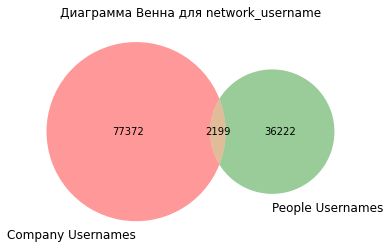

In [62]:
# Получаем уникальные значения network_username для каждой таблицы
set_compan = set(company_df['network_username'].dropna().unique())
set_peopl = set(people_df['network_username'].dropna().unique())

# Построение диаграммы Венна
venn2(subsets=(set_compan, set_peopl),
      set_labels=('Company Usernames', 'People Usernames'))

# Отображение диаграммы
plt.title("Диаграмма Венна для network_username")
plt.show()

In [63]:
# Проверим пересечение значений в столбце 'network_username' в company_df и people_df
# Для таблицы company_df
company_usernames = company_df['network_username'].dropna()  # Убираем пропуски
unique_company_usernames = company_usernames.nunique()       # Количество уникальных значений
duplicates_company = company_usernames.duplicated().sum()    # Количество дубликатов

# Для таблицы people_df
people_usernames = people_df['network_username'].dropna()  # Убираем пропуски
unique_people_usernames = people_usernames.nunique()       # Количество уникальных значений
duplicates_people = people_usernames.duplicated().sum()    # Количество дубликатов

# Проверяем пересечение значений между таблицами
common_usernames = set(company_usernames).intersection(set(people_usernames))
num_common_usernames = len(common_usernames)

print(f"Уникальные значения network_username в company_df: {unique_company_usernames}")
print(f"Дубликаты network_username в company_df: {duplicates_company}")
print(f"Уникальные значения network_username в people_df: {unique_people_usernames}")
print(f"Дубликаты network_username в people_df: {duplicates_people}")
print(f"Количество общих значений network_username между таблицами: {num_common_usernames}")

Уникальные значения network_username в company_df: 79571
Дубликаты network_username в company_df: 15963
Уникальные значения network_username в people_df: 38421
Дубликаты network_username в people_df: 446
Количество общих значений network_username между таблицами: 2199


- Количество общих значений между таблицами `company_df` и `people_df` - 2199, это достаточно малое количество, поэтому объединение нецелесообразно.  

### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету company_and_rounds.csv. В нём много пропусков как раз в информации о раундах, которая заказчику важна. 
- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.
 
По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.
- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

В датафрейме `company_and_rounds` содержатся столбцы с общей уникальной информацией о компаниях и столбцы с данными о раундах финансирования. На то , что датафрейм был создан из двух таблиц: с уникальной информацией о компаниях и с информацией о раундах финансирования, указавают следующие признаки: 
- `company_id` и `company_id_round` содержат одинаковые или связанные значения, это явный признак объединения,
- разные тематические группы столбцов

Поэтому разделим эти данные на две таблицы по тематике.

In [64]:
company_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_round', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round', 'year'],
      dtype='object')

In [65]:
# Разделяем по столбцам с удалением дубликатов
df_company = company_df[['company_id', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 
                         'domain', 'network_username', 'country_code', 'investment_rounds', 
                         'funding_rounds', 'funding_total', 'milestones']].drop_duplicates(subset=['company_id']).reset_index(drop=True)

df_rounds = company_df[['investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
                        'funding_round_id', 'company_id_round', 'funded_at',
                        'funding_round_type', 'raised_amount', 'pre_money_valuation',
                        'participants', 'is_first_round', 'is_last_round', 'year']].drop_duplicates(subset=['funding_round_id']).reset_index(drop=True)


In [66]:
df_company.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,"39,750,000.00",5.00
1,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
2,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00
3,"10,000.00",MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.00,0.00,0.00,0.00
4,"10,001.00",THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.00,0.00,0.00,0.00


In [67]:
df_rounds.head()

,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id_round,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,0.00,3.00,"39,750,000.00",5.00,888.00,1.00,2005-10-01,series-a,"5,250,000.00",0.00,2.00,0.00,1.00,2005
1,0.00,3.00,"39,750,000.00",5.00,889.00,1.00,2007-01-01,series-b,"9,500,000.00",0.00,3.00,0.00,0.00,2007
2,0.00,3.00,"39,750,000.00",5.00,"2,312.00",1.00,2008-05-19,series-c+,"25,000,000.00",0.00,4.00,1.00,0.00,2008
3,0.00,0.00,0.00,0.00,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
4,0.00,1.00,"5,000,000.00",3.00,"1,644.00","1,001.00",2008-02-26,series-a,"5,000,000.00",0.00,3.00,1.00,1.00,2008


- В итоге созданы две новые таблицы: таблица компаний с уникальными данными о каждой компании и таблица раундов с данными о финансировании. В результате итого появилась возможность легко анализировать данные в разрезе компаний.

## 3. Исследовательский анализ объединённых таблиц

### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании. 

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета company_and_rounds.csv — выберите только те компании, у которых указаны значения funding_rounds или investment_rounds больше нуля, или те, у которых в колонке status указано acquired. В результирующей таблице должно получиться порядка 40 тысяч компаний.
Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

Для дальнейшего анализа объединим в одну таблицу company_df с уникальной информацией о компаниях с таблицей acquisition_df, в которой содержится информация о продаваемых компаниях. 

In [68]:
# Отфильтруем в df_company компании, в которых funding_rounds или investment_rounds больше нуля,
# или те, у которых в колонке status указано acquired
df_company_filt = df_company.loc[(df_company['funding_rounds'] > 0) | (df_company['investment_rounds'] > 0) | (df_company['status'] == 'acquired')]
df_company_filt

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,"39,750,000.00",5.00
1,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00
2,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00
13,"1,001.00",FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,"5,000,000.00",3.00
18,"10,014.00",Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.00,1.00,0.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196544,"1,344.00",Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.00,1.00,"10,000,000.00",0.00
196545,"142,181.00",Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.00,1.00,"500,000.00",1.00
196549,"3,429.00",Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,4.00,"44,000,000.00",6.00
196550,"7,748.00",Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,1.00,"1,300,000.00",3.00


Присоединим acquisition_df к полученной таблице df_company_filt.

In [69]:
company_acquisition_df = df_company_filt.merge(acquisition_df, left_on = 'company_id', right_on = 'acquired_company_id', how = 'left')
company_acquisition_df.head(10)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,"39,750,000.00",5.00,NaN,NaN,NaN,NaN,NaN,NaT
1,10.00,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,0.00,0.00,0.00,1.00,11.00,10.00,NaN,"20,000,000.00",2007-05-30
2,100.00,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,0.00,0.00,4.00,20.00,377.00,100.00,cash,0.00,2005-05-29
3,"1,001.00",FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,"5,000,000.00",3.00,"1,901.00",5.00,"1,001.00",cash_and_stock,"47,500,000.00",2009-08-10
4,"10,014.00",Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.00,1.00,0.00,4.00,"3,878.00","23,054.00","10,014.00",NaN,0.00,2010-09-30
5,"10,015.00",Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.00,5.00,"68,069,200.00",0.00,NaN,NaN,NaN,NaN,NaN,NaT
6,"100,155.00",MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0.00,3.00,"10,125,300.00",1.00,NaN,NaN,NaN,NaN,NaN,NaT
7,"10,018.00",Demandbase,analytics,operating,2006-01-01,NaT,demandbase.com,Demandbase,USA,0.00,3.00,"33,000,000.00",3.00,NaN,NaN,NaN,NaN,NaN,NaT
8,"100,189.00",Locatrix Communications,mobile,operating,2003-11-01,NaT,locatrix.com,NaN,AUS,0.00,1.00,"250,000.00",1.00,NaN,NaN,NaN,NaN,NaN,NaT
9,"10,020.00",Threebrix E-services Pvt Ltd,NaN,operating,NaT,NaT,NaN,NaN,NaN,1.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaT


In [70]:
company_acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float32       
 10  funding_rounds        40890 non-null  float32       
 11  funding_total         40890 non-null  float32       
 12  milestones            40890 non-null  float32       
 13  id              

In [71]:
company_acquisition_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

In [72]:
# Проверка на дубликаты
duplicates = company_acquisition_df.duplicated()

# Подсчет количества дубликатов
num_duplicates = duplicates.sum()

print(f"Количество дубликатов: {num_duplicates}")

Количество дубликатов: 0


In [73]:
# Проверим пропуски
na_company_acquisition = pd.DataFrame({'Количество пропусков': company_acquisition_df.isna().sum(),
                                       'Доля пропусков (%)': (company_acquisition_df.isna().mean() * 100).round(2)})
print(na_company_acquisition)

                      Количество пропусков  Доля пропусков (%)
company_id                               0                0.00
name                                     0                0.00
category_code                         5454               13.34
status                                   0                0.00
founded_at                           12979               31.74
closed_at                            38762               94.80
domain                                5007               12.25
network_username                     19952               48.79
country_code                          6032               14.75
investment_rounds                        0                0.00
funding_rounds                           0                0.00
funding_total                            0                0.00
milestones                               0                0.00
id                                   31500               77.04
acquiring_company_id                 31500             

- Пропуски в столбцах: `id`, `acquiring_company_id`, `acquired_company_id`, `term_code`, `price_amount`, `acquired_at` очень значительные 77-95.5%. Данные пропуски образовались при слиянии таблиц, вследствии отсутствия данных.
- Типы данных соответсвуют значениям.

In [74]:
# Удалим строки с пропущенными значениями в столбце id
filteredd_df = company_acquisition_df.dropna(subset=['id'])

# Проверим, что пропуски удалены
print("Количество пропусков в столбце id после фильтрации:", filteredd_df['id'].isnull().sum())

Количество пропусков в столбце id после фильтрации: 0


In [75]:
# Проверка, что acquiring_company_id != acquired_company_id
print(filteredd_df[filteredd_df['acquiring_company_id'] == filteredd_df['acquired_company_id']])

       company_id                        name  category_code    status  \
636     11,488.00               Advertise.com    advertising  acquired   
1236        13.00                 StumbleUpon            web  acquired   
4811   156,626.00         Apollo Matrix, Inc.       software  acquired   
6260   164,283.00                      mrs2be    advertising  acquired   
6598   166,351.00                       LLLer      education  acquired   
8812   178,137.00       Satisnet Technologies          other  acquired   
8813   178,137.00       Satisnet Technologies          other  acquired   
14826   23,241.00               Sigma Designs  semiconductor  acquired   
16487  242,649.00             4hak Developers       software  acquired   
20024   26,717.00           Veeco Instruments       hardware  acquired   
24457   31,179.00                 EUSA Pharma        biotech  acquired   
24715    3,187.00            Replay Solutions       software  acquired   
24915   32,394.00                     

In [76]:
# Проверка уникальности столбца id
is_uni = filteredd_df['id'].is_unique
print("Уникальны ли значения в столбце id?", is_uni)

Уникальны ли значения в столбце id? True


### 3.2. Анализ выбросов
Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.
- По предобработанному столбцу funding_total графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом .describe(), — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [77]:
# Выведем основые статистики по столбцу 'funding_total'
company_acquisition_df['funding_total'].describe()

count          40,890.00
mean       10,135,586.00
std        56,412,888.00
min                 0.00
25%                 0.00
50%           600,000.00
75%         5,631,320.00
max     5,699,999,744.00
Name: funding_total, dtype: float64

- Сильный разброс данных: стандартное отклонение (56.4 миллиона) значительно превышает среднее значение (10.1 миллиона), что указывает на наличие выбросов.

- Максимальное значение (5.7 миллиарда) сильно отличается от медианы (600,000) и третьего квартиля (5.6 миллиона).

- Наличие нулевых значений: минимальное значение равно 0, и 25% компаний имеют финансирование, равное 0. Это может быть связано с тем, что компании не привлекали финансирование; данные содержат ошибки (например, пропущенные значения были заменены на 0).

- Наблюдается ассиметрия распределения, медиана (600,000) значительно меньше среднего значения (10.1 миллиона), что указывает на правостороннюю асимметрию (большинство значений сосредоточено в левой части распределения, а выбросы — в правой).

- Выявлены выбросы, максимальное значение (5.7 миллиарда) является выбросом. Такие значения могут искажать результаты анализа, особенно если используются методы, чувствительные к выбросам (например, среднее значение).


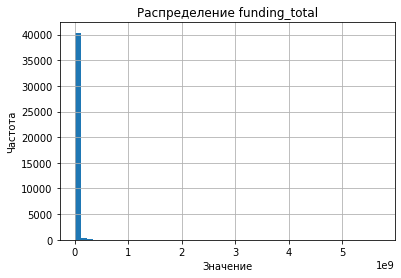

In [78]:
# Построим гистограмму расспределения для funding_total
company_acquisition_df['funding_total'].hist(bins=50)
plt.title('Распределение funding_total')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

In [79]:
# Посчитаем нулевых значений в столбце funding_total
zero_count = company_acquisition_df['funding_total'].eq(0).sum()
print("Количество нулевых значений в столбце funding_total:", zero_count)

Количество нулевых значений в столбце funding_total: 12972


- В funding_total очень много нулевых значений - 12972. Их лучше отфильтровать, чтобы избежать искажения результатов.

In [80]:
filtered_company_acquisition_df = company_acquisition_df[company_acquisition_df['funding_total'] != 0]
filtered_company_acquisition_df

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.00,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,3.00,"39,750,000.00",5.00,NaN,NaN,NaN,NaN,NaN,NaT
3,"1,001.00",FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.00,1.00,"5,000,000.00",3.00,"1,901.00",5.00,"1,001.00",cash_and_stock,"47,500,000.00",2009-08-10
5,"10,015.00",Fitbit,health,operating,2007-10-01,NaT,fitbit.com,fitbit,USA,0.00,5.00,"68,069,200.00",0.00,NaN,NaN,NaN,NaN,NaN,NaT
6,"100,155.00",MTPV,cleantech,operating,2003-01-01,NaT,mtpv.com,NaN,USA,0.00,3.00,"10,125,300.00",1.00,NaN,NaN,NaN,NaN,NaN,NaT
7,"10,018.00",Demandbase,analytics,operating,2006-01-01,NaT,demandbase.com,Demandbase,USA,0.00,3.00,"33,000,000.00",3.00,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,"1,344.00",Vobile,web,operating,2005-01-01,NaT,vobileinc.com,networkmobile,USA,0.00,1.00,"10,000,000.00",0.00,NaN,NaN,NaN,NaN,NaN,NaT
40886,"142,181.00",Stop Being Watched,software,operating,2010-06-10,NaT,stopbeingwatched.com,SBWinfonetwork,USA,0.00,1.00,"500,000.00",1.00,NaN,NaN,NaN,NaN,NaN,NaT
40887,"3,429.00",Zend Technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,USA,0.00,4.00,"44,000,000.00",6.00,NaN,NaN,NaN,NaN,NaN,NaT
40888,"7,748.00",Flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,USA,0.00,1.00,"1,300,000.00",3.00,NaN,NaN,NaN,NaN,NaN,NaT


In [81]:
# Выведем основые статистики по столбцу 'funding_total' после фильтрации 0
filtered_company_acquisition_df['funding_total'].describe()

count          27,918.00
mean       14,845,051.00
std        67,758,760.00
min               291.00
25%           500,000.00
50%         2,573,200.00
75%        11,000,000.00
max     5,699,999,744.00
Name: funding_total, dtype: float64

- После фильтрации нулевых значений остается огромный разброс данных от очень малых (min 291.00) до огромных (max 5,699,999,744.00). Поэтому в данном случае к таким данным не применимы обычные способы нахождения типичных значений (среднее, медиана и квартили).

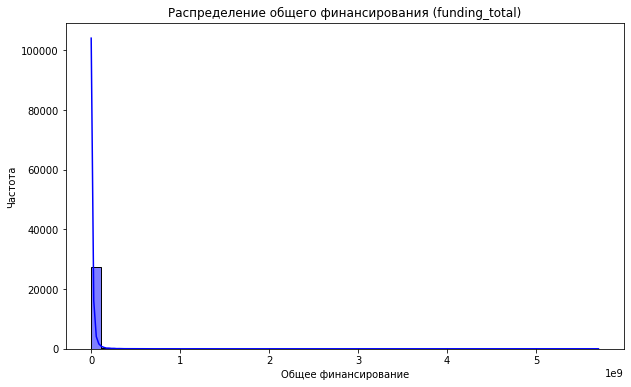

In [82]:
# Построим гистограмму'funding_total'
plt.figure(figsize=(10, 6))
sns.histplot(filtered_company_acquisition_df['funding_total'], bins=50, kde=True, color='blue')
plt.title('Распределение общего финансирования (funding_total)')
plt.xlabel('Общее финансирование')
plt.ylabel('Частота')
plt.show()

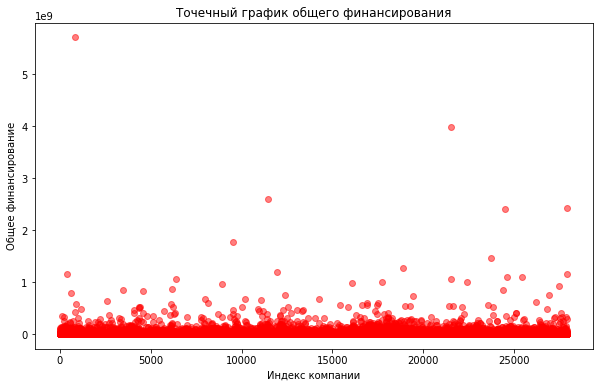

In [83]:
# Построим диаграмму рассеяния 
plt.figure(figsize=(10, 6))
plt.scatter(range(len(filtered_company_acquisition_df)), filtered_company_acquisition_df['funding_total'], alpha=0.5, color='red')
plt.title('Точечный график общего финансирования')
plt.xlabel('Индекс компании')
plt.ylabel('Общее финансирование')
plt.show()

- На графиках можно отметить, что самое значительное количество данных сосредоточено около 110000 - 130000 и его при таких исходных данных можно считать типичным размером общего финансирования для одной компании.

### 3.3. Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.
- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца funding_total и укажите, каким процентилям границы соответствуют.

In [84]:
# Отфильтруем компании, проданные за ноль или за один доллар с ненулевым общим финансированием
zero_or_one_dollar_companies = company_acquisition_df[(company_acquisition_df['price_amount'].isin([0, 1])) & (company_acquisition_df['funding_total'] > 0)]

print("Компании, проданные за 0 или 1 доллар с ненулевым финансированием:")
print(zero_or_one_dollar_companies[['name', 'funding_total', 'price_amount', 'category_code', 'country_code']])

Компании, проданные за 0 или 1 доллар с ненулевым финансированием:
              name  funding_total  price_amount category_code country_code
25         Jumptap 121,500,000.00          0.00        mobile          USA
63        SideTour   4,000,000.00          0.00           web          USA
66      ChoicePass     250,000.00          0.00    enterprise          USA
67      Producteev   1,310,000.00          0.00      software          USA
68       TradeCard  44,925,000.00          0.00    enterprise          USA
...            ...            ...           ...           ...          ...
40834  Amie Street   3,900,000.00          0.00           web          USA
40836     UBmatrix   5,172,350.00          0.00      software          USA
40840   wunderloop  10,000,000.00          0.00   advertising          USA
40854       Zimbra  14,500,000.00          0.00    enterprise          USA
40872         Yoke     500,000.00          0.00           web          NaN

[1618 rows x 5 columns]


In [85]:
zero_or_one_dollar_companies

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
25,"10,054.00",Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0.00,7.00,"121,500,000.00",3.00,"9,288.00","23,283.00","10,054.00",cash_and_stock,0.00,2013-08-13
63,"101,312.00",SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0.00,3.00,"4,000,000.00",2.00,"9,653.00","11,391.00","101,312.00",NaN,0.00,2013-09-18
66,"101,340.00",ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0.00,1.00,"250,000.00",1.00,"7,272.00","1,972.00","101,340.00",NaN,0.00,2012-06-18
67,"10,137.00",Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0.00,3.00,"1,310,000.00",2.00,"8,254.00",757.00,"10,137.00",cash_and_stock,0.00,2012-11-05
68,"10,139.00",TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0.00,2.00,"44,925,000.00",1.00,"9,326.00","44,008.00","10,139.00",NaN,0.00,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,99.00,Amie Street,web,acquired,2011-07-04,NaT,amiestreet.com,amiestreet_logs,USA,0.00,2.00,"3,900,000.00",0.00,"7,024.00",317.00,99.00,NaN,0.00,2010-09-22
40836,"9,905.00",UBmatrix,software,acquired,2005-01-01,NaT,ubmatrix.com,NaN,USA,0.00,2.00,"5,172,350.00",0.00,"3,381.00","41,119.00","9,905.00",NaN,0.00,2010-06-24
40840,992.00,wunderloop,advertising,acquired,1999-01-01,NaT,wunderloop.com,NaN,USA,0.00,1.00,"10,000,000.00",1.00,"9,916.00","19,182.00",992.00,NaN,0.00,2010-07-02
40854,997.00,Zimbra,enterprise,acquired,2003-01-01,NaT,zimbra.com,zimbra,USA,0.00,1.00,"14,500,000.00",3.00,"9,121.00",415.00,997.00,NaN,0.00,2013-07-15


- Проанализируем компании по области деятельности, стране.

In [86]:
# Выведем распределение компаний по области деятельности
print("Распределение по области дейтельности компании:")
zero_or_one_dollar_companies['category_code'].value_counts()

Распределение по области дейтельности компании:


software            362
web                 216
enterprise          131
mobile              118
advertising          77
games_video          76
biotech              69
ecommerce            61
network_hosting      56
semiconductor        43
cleantech            40
hardware             36
analytics            32
security             30
public_relations     26
other                20
search               18
social               17
travel               16
messaging            16
health               13
medical              11
consulting           10
education            10
news                  9
music                 8
finance               7
fashion               5
manufacturing         3
photo_video           3
hospitality           3
design                3
transportation        2
legal                 2
automotive            2
sports                2
Name: category_code, dtype: int64

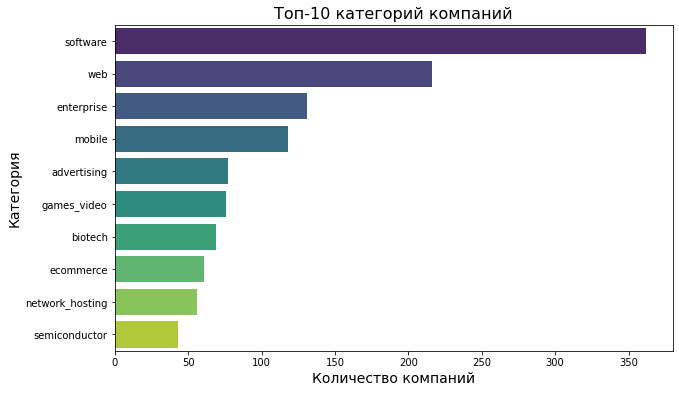

In [87]:
# Выведем на линейной диаграмме топ-10 компаний по области деятельности,
# проданных за ноль или за один доллар с ненулевым общим финансированием
top_10_categories = zero_or_one_dollar_companies['category_code'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_categories.values, 
            y=top_10_categories.index, 
            palette="viridis")

plt.title('Топ-10 категорий компаний', fontsize=16)
plt.xlabel('Количество компаний', fontsize=14)
plt.ylabel('Категория', fontsize=14)
plt.show()

In [88]:
# Выведем распределение компаний по странам
print("Распределение по странам:")
zero_or_one_dollar_companies['country_code'].value_counts()

Распределение по странам:


USA    1236
GBR      64
CAN      46
DEU      31
ISR      27
FRA      24
IRL      11
DNK       9
SWE       8
IND       7
ESP       7
FIN       6
CHE       6
ITA       6
NLD       5
JPN       5
ARG       4
CHN       4
BEL       4
NOR       4
AUT       3
SGP       3
AUS       2
BGR       2
CZE       1
CHL       1
THA       1
POL       1
UMI       1
URY       1
TUR       1
HUN       1
BRA       1
KOR       1
HKG       1
RUS       1
Name: country_code, dtype: int64

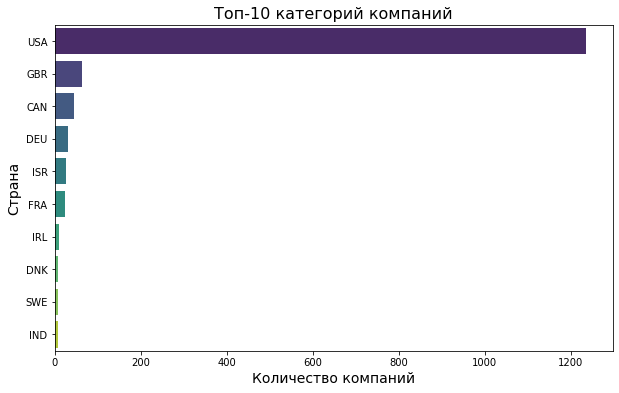

In [89]:
# Выведем на линейной диаграмме топ-10 компаний по области деятельности,
# проданных за ноль или за один доллар с ненулевым общим финансированием
top_10_countries = zero_or_one_dollar_companies['country_code'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, 
            y=top_10_countries.index, 
            palette="viridis")

plt.title('Топ-10 категорий компаний', fontsize=16)
plt.xlabel('Количество компаний', fontsize=14)
plt.ylabel('Страна', fontsize=14)
plt.show()

In [90]:
# Выведем основные статистики по funding_total
funding_analysis = zero_or_one_dollar_companies['funding_total'].describe()
print("Описательная статистика по funding_total:")
print(funding_analysis)

Описательная статистика по funding_total:
count           1,618.00
mean       18,152,964.00
std       144,503,024.00
min             3,750.00
25%         2,000,000.00
50%         6,000,000.00
75%        15,500,000.00
max     5,699,999,744.00
Name: funding_total, dtype: float64


In [91]:
# Расчет квартилей и IQR
Q1 = zero_or_one_dollar_companies['funding_total'].quantile(0.25)
Q3 = zero_or_one_dollar_companies['funding_total'].quantile(0.75)
IQR = Q3 - Q1

# Расчет границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"25%-й процентиль (Q1): {Q1}")
print(f"75%-й процентиль (Q3): {Q3}")
print(f"Межквартильный размах (IQR): {IQR}")
print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")

25%-й процентиль (Q1): 2000000.0
75%-й процентиль (Q3): 15500000.0
Межквартильный размах (IQR): 13500000.0
Нижняя граница выбросов: -18250000.0
Верхняя граница выбросов: 35750000.0


In [92]:
# Определение процентилей для границ
lower_percentile = zero_or_one_dollar_companies['funding_total'].le(lower_bound).mean() * 100
upper_percentile = zero_or_one_dollar_companies['funding_total'].ge(upper_bound).mean() * 100

print(f"Нижняя граница соответствует {lower_percentile:.2f}%-му процентилю.")
print(f"Верхняя граница соответствует {100 - upper_percentile:.2f}%-му процентилю.")

Нижняя граница соответствует 0.00%-му процентилю.
Верхняя граница соответствует 90.91%-му процентилю.


- Среди компаний, проданных за 0 и 1 долларов, лидируют такие области деятельности как: software (362), web (216) , interprise (131). По принадлежности к стране со значительным отрывом лидирует USA (1236). Т.к. у этих компаний были раунды финансирования, то значения 0 и 1 в столбце с общей суммой финансирования скорее всего связаны либо с отсутствием данных и некорректной "заглушкой" либо с ошибкой при загрузке.
- Большинство компаний (50%) имеют финансирование в диапазоне от 2,000,000 до 15,500,000. Это можно считать "нормой" для вашего набора данных.
- Компании с финансированием больше 35,750,000 являются редкими и могут требовать отдельного анализа. Это могут быть крупные корпорации или компании на поздних этапах финансирования.
- Распределение финансирования скошено вправо, что типично для финансовых данных (большинство значений небольшие, но есть несколько очень крупных).

### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. 

Среди категорий стартапов выделите категории стартапов, характеризующиеся:
- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [93]:
# Выведем основные статистики по price_amount
print("Описательная статистика по price_amount:")
company_acquisition_df['price_amount'].describe()

Описательная статистика по price_amount:


count               9,390.00
mean          393,988,145.31
std        26,846,244,613.76
min                     0.00
25%                     0.00
50%                     0.00
75%                23,625.50
max     2,600,000,000,000.00
Name: price_amount, dtype: float64

In [94]:
company_acquisition_df['price_amount'].value_counts()

0.00                    6917
10,000,000.00             44
30,000,000.00             38
50,000,000.00             37
20,000,000.00             36
                        ... 
322,270,000.00             1
2,600,000,000,000.00       1
36,120,000.00              1
12,600.00                  1
3,190,000.00               1
Name: price_amount, Length: 1036, dtype: int64

- В данных о цене сделки приобладает значение  - 0, это может быть связано с отсутствием информации или с  ошибкой при ее загрузке. Это может значительно искажать результаты анализа, поэтому отфильтруем такие компании.
- Max значение суммы сделки составляет 2,600,000,000,000.00. Это может быть как реальной суммой, т.к и ошибкой, и искажает среднее значение и стандартное отклонение.
- Огромное стандартное отклонение 26,846,244,613.76 указывает на сильный разброс данных и подтверждает наличие выбросов.

In [95]:
# Отфильтруем в 'price_amount'значения 0 и 1
df_filtered_price = company_acquisition_df[(company_acquisition_df['price_amount'] > 1)]

In [96]:
# Выведем основные статистики по price_amount после фильтрации
print("Описательная статистика по price_amount:")
df_filtered_price['price_amount'].describe()

Описательная статистика по price_amount:


count               2,470.00
mean        1,497,792,989.66
std        52,336,127,704.48
min                    11.00
25%            12,925,000.00
50%            56,450,000.00
75%           265,000,000.00
max     2,600,000,000,000.00
Name: price_amount, dtype: float64

- Наблюдается огромный разброс данных, среднее значение - 1,497,792,989.66 очень значительно отличается от медианы - 56,450,000.00. Поэтому для расчета типичной цены по категориям будем использовать медиану, а для разброса цен - межквартильный размах. 

In [97]:
# Сгруппируем по категории компании и расчитаем медиану, стандартное отклонение и межквартильный размах
category_stats = df_filtered_price.groupby('category_code')['price_amount'].agg(median_price='median',
                                                                                std_price='std',
                                                                                iqr_pricee=lambda x: 
                                                                                x.quantile(0.75) - x.quantile(0.25)).reset_index()
# Удаляем пропуски
category_stats = category_stats.dropna()
# Отсортируем по медиане и разбросу
category_stats_sorted = category_stats.sort_values(by=['median_price', 'std_price'], ascending=[False, False])

In [98]:
category_stats_sorted 

,category_code,median_price,std_price,iqr_pricee
2,automotive,"2,400,000,000.00","2,581,669,292.02","2,578,500,000.00"
33,sports,"622,500,000.00","512,652,416.36","362,500,000.00"
27,real_estate,"400,000,000.00","2,676,302,206.40","970,000,000.00"
16,manufacturing,"351,000,000.00","1,060,434,506.33","1,240,000,000.00"
34,transportation,"230,000,000.00","572,625,532.09","540,000,000.00"
3,biotech,"200,000,000.00","1,968,195,263.66","469,000,000.00"
1,analytics,"200,000,000.00","92,967,736.34","91,500,000.00"
9,fashion,"195,000,000.00","86,494,219.46","86,250,000.00"
4,cleantech,"185,000,000.00","874,419,628.26","278,000,000.00"
10,finance,"171,500,000.00","1,052,920,128.98","541,900,000.00"


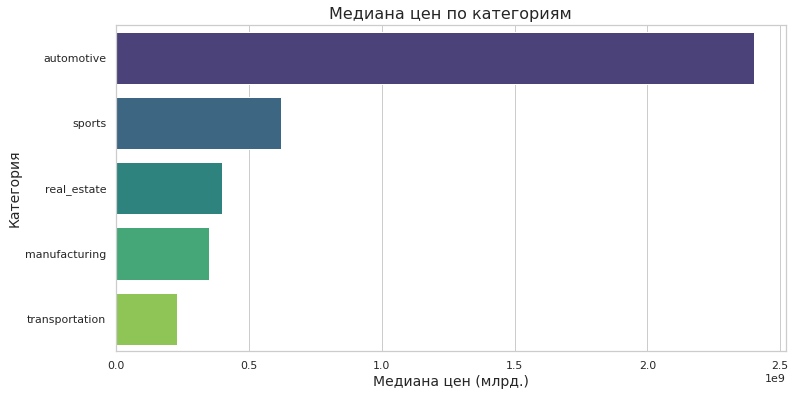

In [99]:
# Построим линейчатую диаграмму топ-5 медианы цен по катеории компаний
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='median_price', 
            y='category_code', 
            data=category_stats_sorted.head(5), 
            palette='viridis')

plt.title('Медиана цен по категориям', fontsize=16)
plt.xlabel('Медиана цен (млрд.)', fontsize=14)
plt.ylabel('Категория', fontsize=14)
plt.show()

In [100]:
# Отсортируем по межквартильному размаху цен
category_stats_sorted_by_iqr_price_and_std = category_stats.sort_values(by=['iqr_pricee', 'std_price'], ascending=[False, False])
print(category_stats_sorted_by_iqr_price_and_std)

       category_code     median_price          std_price       iqr_pricee
2         automotive 2,400,000,000.00   2,581,669,292.02 2,578,500,000.00
16     manufacturing   351,000,000.00   1,060,434,506.33 1,240,000,000.00
27       real_estate   400,000,000.00   2,676,302,206.40   970,000,000.00
10           finance   171,500,000.00   1,052,920,128.98   541,900,000.00
34    transportation   230,000,000.00     572,625,532.09   540,000,000.00
3            biotech   200,000,000.00   1,968,195,263.66   469,000,000.00
29          security   164,500,000.00   1,378,442,023.15   446,250,000.00
26  public_relations   110,000,000.00   6,854,337,755.92   389,375,000.00
33            sports   622,500,000.00     512,652,416.36   362,500,000.00
14       hospitality    57,500,000.00     790,600,556.24   357,550,000.00
6          ecommerce   157,500,000.00     281,425,549.37   336,537,500.00
24             other    73,100,000.00   2,072,556,420.42   326,650,000.00
22   network_hosting   102,500,000.00 

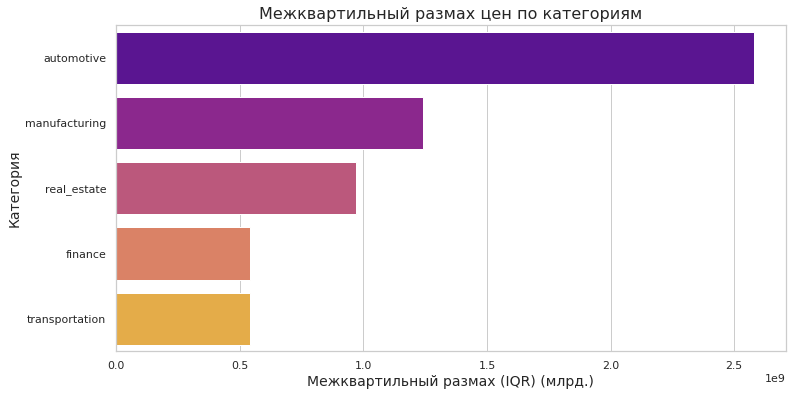

In [101]:
# Построим линейчатую диаграмму топ-5 межквартильного размаха цен по категории компании
plt.figure(figsize=(12, 6))
sns.barplot(x='iqr_pricee', 
            y='category_code', 
            data= category_stats_sorted_by_iqr_price_and_std.head(5), 
            palette='plasma')

plt.title('Межквартильный размах цен по категориям', fontsize=16)
plt.xlabel('Межквартильный размах (IQR) (млрд.)', fontsize=14)
plt.ylabel('Категория', fontsize=14)
plt.show()

- В качестве топа выбрано 5 значений медианы самых высоких цен и 5 значений самого большого разброса цен. Ниже этих значений в остальных категориях данные более однородные по количеству и незначительно отличаются друг от друга. При этом в оба топ-5 вошли такие категории как: automotive, real_estate, manufacturing и transportation. На основе этих данных можно сделать вывод, что эти области деятельности отличаюся высокими ценами покупки компаний, а также высоким разбросом цен.

### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец funding_rounds. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [102]:
# Выведем основные статистики по funding_rounds
print("Описательная статистика по price_amount:")
company_acquisition_df['funding_rounds'].describe()

Описательная статистика по price_amount:


count   40,890.00
mean         1.29
std          1.26
min          0.00
25%          1.00
50%          1.00
75%          2.00
max         15.00
Name: funding_rounds, dtype: float64

- Среднее значение близкое к медиане говорит о нормальном разбросе данных, поэтому для вычисления типичного значения количества раундов будем использовать среднее.

In [103]:
print("Распределение раундов финансирования в зависимости от статуса компании:")
company_acquisition_df.groupby('status')['funding_rounds'].value_counts().unstack(fill_value=0)

Распределение раундов финансирования в зависимости от статуса компании:


funding_rounds,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,15.00
status,,,,,,,,,,,,,,,,
acquired,6896,1387,629,357,153,59,26,18,7,2,1,1,1,0,0,0
closed,3,1566,362,93,42,14,3,7,2,0,0,0,0,0,0,0
ipo,150,230,94,58,33,27,16,10,9,4,2,3,0,4,0,0
operating,2086,17377,5064,2164,991,501,204,113,49,40,20,6,2,1,1,2


In [104]:
# Группируем компании по статусу и считаем среднее количество раундов финансирования
print("Типичное количество раундов финансирования в зависимости от статуса компании:")
mean_rounds_by_status = company_acquisition_df.groupby('status')['funding_rounds'].mean().reset_index()
mean_rounds_by_status = mean_rounds_by_status.sort_values(by='funding_rounds', ascending=False).reset_index()
mean_rounds_by_status

Типичное количество раундов финансирования в зависимости от статуса компании:


,index,status,funding_rounds
0,2,ipo,1.93
1,3,operating,1.52
2,1,closed,1.38
3,0,acquired,0.53


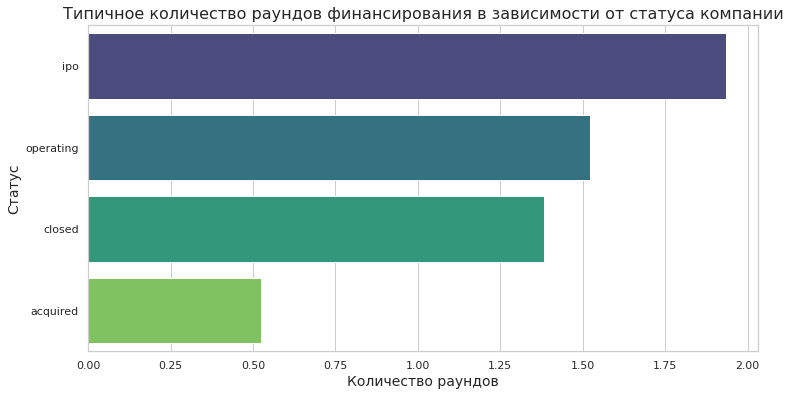

In [105]:
# Построим линейчатую диаграмму топ-5 межквартильного размаха цен по категории компании
plt.figure(figsize=(12, 6))
sns.barplot(x='funding_rounds', 
            y='status', 
            data= mean_rounds_by_status,
            palette='viridis')

plt.title('Типичное количество раундов финансирования в зависимости от статуса компании', fontsize=16)
plt.xlabel('Количество раундов', fontsize=14)
plt.ylabel('Статус', fontsize=14)
plt.show()

- Лидерами по среднему количеству раундов финансирования (1.93) являются успешные и стабильные компании в статусе `ipo`, у которых было проведено первичное публичное предложение своих акций на бирже. Самый большой показатель среднего значения объясняется тем, что компании, которые выходят на IPO, обычно проходят несколько раундов финансирования (Series A, B, C и т.д.), чтобы достичь достаточной зрелости и масштаба для публичного размещения. На втором месте (1.52) действующие компании - `operating`, которые активно работают и ведут свою основную деятельность. Это самый распространённый статус для компаний, которые не закрылись, не были поглощены (acquired) и не провели IPO. На третьем - компании, прекратившие свою деятельность  (1.38). На последнем - `acquire` проданные компании (0.53), самое низкое среднее может быть по причине достаточно ранней продажи компаний.

## 4. Итоговый вывод и рекомендации

- Целью проекта было подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса. 
- Проанализирована информация о стартапах, состоящая из 7 датасетов с информацией о компаниях, сотрудниках и их образовании, о раундах и фондах финансирования.
- На первичном этапе предобработки было выявлено, что информация в значительной мере не полная и содержит большое количество пропусков (до 98.42%). Большинство пропусков может быть связано с необязательностью заполнением этих данных или ,если они не были указаны/собраны, а также с ошибками при загрузке. Все пропуски были оставлены без изменений. Данные, содержащие даты, приведены к типу `datetime`, в столбцах с типом данных `float` выполнено понижение размерности.

На втором этапе предобработки и первичном исследовании выявлено:

- На конец периода исследования 2013 год выявлена следующая тенденция - стало очень много мелких стартапов, которые активно финансируется, поэтому с одной стороны происходит рост раундов, и рост суммарных инвестиций, а с другой стороны снижение суммы инвестиций раунда.
- Полнота данных об образовании сотрудников зависит от размера компании. В крупных компаниях данные более полные.
- Самый проблемный датасет `company_and_rounds` по количеству пропусков разделен на два изначальных датасета: с уникальной информацией о компаниях и с информацией о раундах финансирования.

- На этапе исследовательского анализа проанализированы проданные компании, получавшие инвестиции или финансирование, т.е. которые были интересны инвесторам и покупателям. Для этого создан новый датафрейм (40890 строк) из таблицы, с уникальной информацией о компаниях и таблицы с информацией о проданных компаниях. 
- Данные, необходимые для анализа содержат очень много экстремально малых (`0`) и экстремально больших значений в триллионах денежных единиц, имеют огромные стандартные отклонения, что говорит об их значительной неоднородности. Нулевые значения в суммах инвестирования одного раунда, общей сумме инвестирования и сумме сделки (значения 0 и 1) могут быть трактованы как некорректная замена пропусков "заглушками", так и отсутствием информации или ошибками при загрузке данных. Данные такого качества могут значительно искажать результаты исследования.

В результате анализа выявлено:

- Графическим методом выявлено, что типичный размер общего финансирования для одной компании составляет около 120,000. Что является достаточно малым значением и вызывает сомнения в части истинности.
- Среди компаний, проданных по отчестности бесплатно (0 usd, 1 usd), лидируют страны из USA (1236) и занимающиеся программным обеспечением (362). 
- Большинство компаний (50%) имеют финансирование в диапазоне от 2,000,000 до 15,500,000. Это можно считать "нормой" для вашего набора данных. Компании с финансированием больше 35,750,000 являются редкими и могут требовать отдельного анализа. Это могут быть крупные корпорации или компании на поздних этапах финансирования. Распределение финансирования скошено вправо, что типично для финансовых данных (большинство значений небольшие, но есть несколько очень крупных).
- Области деятельности компаний: `automotive`, `real_estate`, `manufacturing` и `transportation` отличаюся высокими ценами покупки компаний, а также высоким разбросом цен.
- Больше всего раундов финансирования (1.93) выявлено у компаний в статусе `ipo`, это объясняется тем, что компании, которые выходят на IPO, обычно проходят несколько раундов финансирования (Series A, B, C и т.д.), чтобы достичь достаточной зрелости и масштаба для публичного размещения. 


Для того, чтобы повысить информативность анализа и результаты были более реалистичными, рекомендуется избегать появления пропусков в данных и особое внимание обратить на корректность заполнения пропусков при отсутствии информации.